## Twitter Data Analysis
* Connecting to twitter.com using a user authentication and its api.
* we can search tweets and get sentiment on about any topic using wide variety of methods.

In [1]:
!pip install tweepy

In [2]:
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Variables that contains the user specific credentials to access Twitter API
# Please create yours by going to https://developer.twitter.com/en 
access_token = "3330087118-dnkNytgjujqLJg2fs0RIldyHKgiZoix8DpEIV1iKXhW"
access_token_secret = "BTgKB6tvJ6ssxescB4J5OhC4ssOU2n0AnrVAEf2CRrZcirZ8zuo"
consumer_key = "hcuRfSV4aWjp9AjHazSaqaot2HcS"
consumer_secret = "vLIArJmqrMWizqHcEslrInNjDweECfjthkEreErAE0nWIDRKBSmkJUE"

In [4]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about any keyword in all the latest tweets from delhi
tweets_data=api.search('corona virus',count=100, lang='en', include_rts=False, tweet_mode="extended",
                      geocode="28.7041,77.1025,10km", )
print ("number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Extracting the tweet metadata
for status in tweets_data:
    tweets=tweets.append(status._json, ignore_index=True)

TweepError: [{'code': 215, 'message': 'Bad Authentication data.'}]

In [4]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,retweeted_status,source,truncated,user,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,extended_entities
0,None,None,Mon Aug 31 01:29:28 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @saraspilot: At a time when the country has...,None,1.300244e+18,...,0.0,{'created_at': 'Sun Aug 30 09:10:05 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1297565685736861697, 'id_str': '1297565...",NaN,NaN,NaN,NaN,NaN
1,None,None,Sun Aug 30 22:42:29 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @scotchism: The number of dislikes on Modij...,None,1.300202e+18,...,0.0,{'created_at': 'Sun Aug 30 18:36:39 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 37401445, 'id_str': '37401445', 'name':...",NaN,NaN,NaN,NaN,NaN
2,None,None,Sun Aug 30 21:21:02 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @scotchism: The number of dislikes on Modij...,None,1.300182e+18,...,0.0,{'created_at': 'Sun Aug 30 18:36:39 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 1204293874409037824, 'id_str': '1204293...",NaN,NaN,NaN,NaN,NaN
3,None,None,Sun Aug 30 21:07:06 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @scotchism: The number of dislikes on Modij...,None,1.300178e+18,...,0.0,{'created_at': 'Sun Aug 30 18:36:39 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 917243401, 'id_str': '917243401', 'name...",NaN,NaN,NaN,NaN,NaN
4,None,None,Sun Aug 30 21:05:22 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @scotchism: The number of dislikes on Modij...,None,1.300178e+18,...,0.0,{'created_at': 'Sun Aug 30 18:36:39 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1233234029291261953, 'id_str': '1233234...",NaN,NaN,NaN,NaN,NaN


In [8]:
# Looking at only the tweet texts
tweets['full_text'].unique()

array(['RT @saraspilot: At a time when the country has crossed 3.5 million corona virus cases, even the Health minister after months has realised n…',
       "RT @scotchism: The number of dislikes on Modiji's video is rising like Corona virus cases now. \n\nIT CELL SHOULD WORK HARD TO FLATTEN THE CU…",
       "RT @sharmavishesh26: I don't know what we used to talk about before Corona virus.",
       'The way he lies, is much more dangerous than Corona Virus #मोदीजी_के_झूठ https://t.co/pIT5yaDJwt',
       "The number of dislikes on Modiji's video is rising like Corona virus cases now. \n\nIT CELL SHOULD WORK HARD TO FLATTEN THE CURVE.",
       '@AAP4Jharkhand @AamAadmiParty @ArvindKejriwal @AAPRajasthan @AAPTELANGANA @aartic02 @AAPChhattisgarh @AAPUttarPradesh @AAPUttarakhand Photo me chehra dikhane ke chakkar me shriman mask lagane ka sahi Tarika bhool gaye. With this attitude these people will be contributing in spreading of virus. How it will help in identifying Corona? Is it substit

## Sentiment analysis
Using bag of words model, finding the sentiment of every tweet found

In [12]:
import pandas as pd
PositiveWords=pd.read_table('/Users/farukh/Desktop/Python Machine Learning/Data Science using Python/Python Datasets/Sentiment Analysis/Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('/Users/farukh/Desktop/Python Machine Learning/Data Science using Python/Python Datasets/Sentiment Analysis/Negative_words.txt',encoding='latin-1')

In [13]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral'
    
    else:
        OverallSentiment='Negative'
        
    return(OverallSentiment)

In [14]:
# Calling sentiment score function for every tweet
tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,RT @kapsology: Incorrect headline \n\nThe advi...,Neutral
1,RT @kapsology: Incorrect headline \n\nThe advi...,Neutral
2,RT @kapsology: Incorrect headline \n\nThe advi...,Neutral
3,RT @kapsology: Incorrect headline \n\nThe advi...,Neutral
4,RT @kapsology: Incorrect headline \n\nThe advi...,Neutral


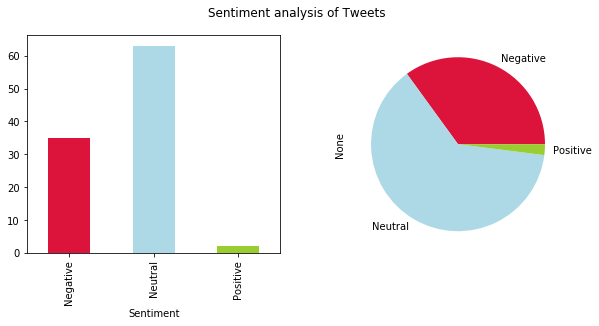

In [23]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

## Wordcloud analysis

In [17]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [18]:
# Observing the tweets text for junk
print(Tweets_String)

['RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest mask to keep you safe from the C…'
 'RT @kapsology: Incorrect headline \n\nThe advisory is about the N95 with a valve. \n\nN95 masks are the safest

### Data Preprocessing: Cleaning the text

In [19]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from corona virus like hindi serials villain always things vaccine real face villain which never comes others covid vaccineforcorona gocoronago incorrect headline nthe advisory about with valve masks safest mask keep safe from incorrect headline nthe advisory about with valve masks safest mask keep safe from robot what think students superman they would affected corona viruses where declared that corona virus pandemic 

### Generating the wordcloud

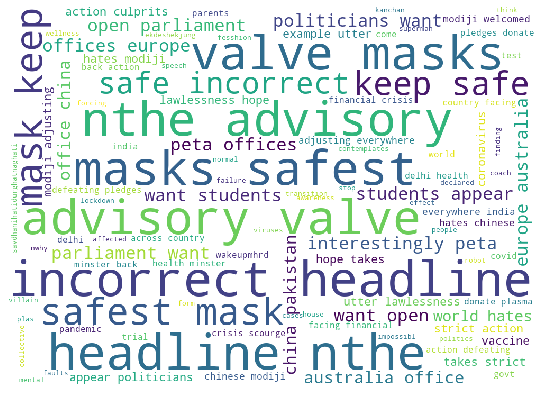

In [22]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['corona','virus','rt','day','https','will']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

## Bigram/Trigram Wordcloud